# Recency, Frequency, Monetary Value (RFM) Analysis

by Julianna Renaud

## The Project

Ranking customers based on their purchase recency, their purchase frequency and their monetary (or lifetime) value with the brand. RFM analysis is a technique that's utilized by marketing departments for customer segmentation. RFM analysis can be useful in identifying high value customers that the business wants to retain, low value and infrequent customers that may be more difficult to convert, and customers that are in various areas between such as those likely to churn and those having the most potential to convert. RFM scores are useful in helping to identify specific groups of target customers for various types of marketing campaigns. By segmenting marketing campaigns, companies can reduce marketing costs and can increase performance for KPIs such as conversion rate.

This project utilizes historical purchase data to assign an RFM score to past customers.

## The Client

The client for this project is a fashion retailer selling selling men's, women's and children's clothing and accessories. This client operates a small number of  This project utilizes data from the client's eCommerce customers.

*For confidentiality purposes, the name of this client will remain anonymous. The client will be referred to as “the Client” throughout.*

## The Data

The client imports purchase data into their Email Service Provider (ESP). For the sake of anonymity, data was pulled using a unique Subscriber ID assigned by the ESP. No Personally Identifiable Information (PII) was utilized. Subscriber ID was utilized in lieu of email address. City and state data were pulled for location of purchase, but not billing or shipping addresses. No payment data was utilized.

The purchase data is from 12/29/2011 through 2/2/2018. 

The Purchase file was pulled using SQL queries from the ESP which provided all purchase details such as Order ID, Product ID (SKU), Subscriber ID (purchaser). The file contained a single row for each SKU purchased in a order and therefore if multiple products were purchased in a single order then there were multiple rows for the same Order ID.

## Methodology

Traditional RFM methodology scores each of the three metrics (recency, frequency and monetary value) on a 1-4 or 1-5 scale. For this project, a 1-4 score was utilized. Range thresholds were determined using quartiles to provide each customer with a 1-4 score for each of the three metrics. As a result, there are 64 different combinations of RFM scores that a customer could receive. A score of 444 represents the most recent customers, who purchase most frequently and have the highest monetary value. The opposite extreme is represented by a score of 111.

### Libraries
(those utilized below, additional libraries were utilized in the preparation of the final dataset utilized in the code below)

* pandas for: data loading, wrangling, cleaning and manipulation, descriptive statistics
* numpy for: array data structure, mathmatical/statistical analysis
* matplotlib for: data visualization

### Data Wrangling and Cleaning

The data came in the form of CSV files which were loaded into pandas dataframes. For confidentiality purposes, much of the data wrangling was performed in a separate notebook. I have noted below the steps that were performed to clean the data and prepare the data into this final dataset. The code below utilizes the clean dataset containing just the Subscriber ID, the recency (in days) of the subscribers most recent purchase, the frequency of purchases made since 12/29/2011. 

* Date fields required proper formatting.
* Pivoting was necessary to create a master file that contained only one row for each Subscriber ID. Some of the data needed to be pivoted and summed (i.e. order value for monetary value and frequency). Some of the data needed to be pivoted and the max value taken (i.e. order date). 

#### Purchase File: This file originally contained 19 columns.

* Only three of the 19 columns contained null data. 
* The majority of the columns in the file were not necessary for RFM scoring and were dropped.
* The purchase date was converted into a date format. The max date was retained when the data was pivoted to create a single row for each Subscriber ID. The recency (in days) was calculated by subtracted the Max purchase date from 2/3/2018 (the day after the most recent purchase on the file).
* Monetary value and Frequency were calculated by deduplicating the file by Order ID, then summing the Order Value (for Monetary Value) and counting the number of unique Order IDs (frequency).

## Results

The dataset for this client turned out to be heavily skewed to single purchasers. As a result, the frequency scores turned out to be 1, 3, 4 resulting in only 48 possible scores. The breakdown of thresholds and counts are as follows:

### Recency
* Recency 1 = 1352- 2229 days: 124,332
* Recency 2 = 838 - 1351 days: 124, 119
* Recency 3 = 310 - 837 days: 124,076
* Recency 4 = 0 - 309 days: 124,008

### Frequency

* Frequency 1 = single purchasers: 315,476
* Frequency 3 = 2x purchasers: 99,859
* Frqeuncy 4 = 3x+ purchasers: 81,200

### Monetary Value

* Monetary 1 = \$0.97 - \$44.97: 124,979
* Monetary 2 = \$44.98 - \$78.98: 124,151
* Monetary 3 = \$78.99 - \$143.84: 124,109
* Monetary 4 = \$143.84 - \$51,496.07: 123,296

The largest RFM group was those with score 111, 38,835 customers. These customers haven't made a purchase in 1,352 days or longer, have only purchased once and spent \$44.97 or less.

The ideal score of 444 was given to 28,581 customers. These customers have purchased sometime within the last 309 days, have made 3 or more purchases with the brand and have a lifetime value of \$143.84 or more.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install watermark

%load_ext watermark

You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
%watermark -a "Julianna Renaud" -d -t -v -p numpy,pandas

Julianna Renaud 2018-03-20 10:20:33 

CPython 3.6.3
IPython 6.1.0

numpy 1.13.3
pandas 0.20.3


In [5]:
#Import Account Master file
df = pd.read_csv('Data Outputs/rfm_df.csv', header=0)

#Check the fields for each
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496535 entries, 0 to 496534
Data columns (total 5 columns):
Unnamed: 0       496535 non-null int64
SubscriberID     496535 non-null float64
Purch_Recency    496535 non-null float64
Frequency        496535 non-null float64
ORDER_VALUE      496535 non-null float64
dtypes: float64(4), int64(1)
memory usage: 18.9 MB
None
   Unnamed: 0  SubscriberID  Purch_Recency  Frequency  ORDER_VALUE
0           0   213165949.0            2.0        1.0        54.00
1           1    35831835.0            2.0        5.0       380.76
2           2   125328287.0            2.0        3.0       735.70
3           3   213162691.0            2.0        1.0        68.00
4           4   213163910.0            2.0        1.0        34.00


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

print(df.head())

   SubscriberID  Purch_Recency  Frequency  ORDER_VALUE
0   213165949.0            2.0        1.0        54.00
1    35831835.0            2.0        5.0       380.76
2   125328287.0            2.0        3.0       735.70
3   213162691.0            2.0        1.0        68.00
4   213163910.0            2.0        1.0        34.00


In [11]:
quantiles = df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [12]:
segmented_rfm = df

In [15]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

def MScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [17]:
segmented_rfm['r_quartile'] = segmented_rfm['Purch_Recency'].apply(RScore, args=('Purch_Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['ORDER_VALUE'].apply(MScore, args=('ORDER_VALUE',quantiles,))
segmented_rfm.tail()

,SubscriberID,Purch_Recency,Frequency,ORDER_VALUE,r_quartile,f_quartile,m_quartile
496530,43885810.0,2223.0,1.0,69.96,1,1,2
496531,101236582.0,2224.0,1.0,44.97,1,1,1
496532,168266368.0,2229.0,1.0,126.91,1,1,3
496533,36041371.0,1813.0,1.0,37.94,1,1,1
496534,38527507.0,1823.0,1.0,99.97,1,1,3


In [37]:
print("Recency Counts:\n")
print(segmented_rfm.r_quartile.value_counts())

Recency Counts:

4    124332
2    124119
1    124076
3    124008
Name: r_quartile, dtype: int64


In [36]:
print("Frequency Counts:\n")
print(segmented_rfm.f_quartile.value_counts())

Frequency Counts:

1    315476
3     99859
4     81200
Name: f_quartile, dtype: int64


In [38]:
print("Monetary Value Counts:\n")
print(segmented_rfm.m_quartile.value_counts())

Monetary Value Counts:

1    124979
3    124151
4    124109
2    123296
Name: m_quartile, dtype: int64


In [19]:
print('Recency Score 1:',segmented_rfm.loc[segmented_rfm['r_quartile'] == 1, 'Purch_Recency'].min(), '-',segmented_rfm.loc[segmented_rfm['r_quartile'] == 1, 'Purch_Recency'].max(), 'days')
print('Recency Score 2:',segmented_rfm.loc[segmented_rfm['r_quartile'] == 2, 'Purch_Recency'].min(),'-',segmented_rfm.loc[segmented_rfm['r_quartile'] == 2, 'Purch_Recency'].max(), 'days')
print('Recency Score 3:',segmented_rfm.loc[segmented_rfm['r_quartile'] == 3, 'Purch_Recency'].min(),'-',segmented_rfm.loc[segmented_rfm['r_quartile'] == 3, 'Purch_Recency'].max(), 'days')
print('Recency Score 4:',segmented_rfm.loc[segmented_rfm['r_quartile'] == 4, 'Purch_Recency'].min(), '-',segmented_rfm.loc[segmented_rfm['r_quartile'] == 4, 'Purch_Recency'].max(), 'days')

Recency Score 1: 1352.0 - 2229.0 days
Recency Score 2: 838.0 - 1351.0 days
Recency Score 3: 310.0 - 837.0 days
Recency Score 4: 0.0 - 309.0 days


In [21]:
print('Frequency Score 1:',segmented_rfm.loc[segmented_rfm['f_quartile'] == 1, 'Frequency'].min(), '-',segmented_rfm.loc[segmented_rfm['f_quartile'] == 1, 'Frequency'].max(), 'lifetime orders')
print('Frequency Score 2:',segmented_rfm.loc[segmented_rfm['f_quartile'] == 2, 'Frequency'].min(),'-',segmented_rfm.loc[segmented_rfm['f_quartile'] == 2, 'Frequency'].max(), 'lifetime orders')
print('Frequency Score 3:',segmented_rfm.loc[segmented_rfm['f_quartile'] == 3, 'Frequency'].min(),'-',segmented_rfm.loc[segmented_rfm['f_quartile'] == 3, 'Frequency'].max(), 'lifetime orders')
print('Frequency Score 4:',segmented_rfm.loc[segmented_rfm['f_quartile'] == 4, 'Frequency'].min(), '-',segmented_rfm.loc[segmented_rfm['f_quartile'] == 4, 'Frequency'].max(), 'lifetime orders')

Frequency Score 1: 1.0 - 1.0 lifetime orders
Frequency Score 2: nan - nan lifetime orders
Frequency Score 3: 2.0 - 2.0 lifetime orders
Frequency Score 4: 3.0 - 216.0 lifetime orders


In [22]:
print('Monetary Value Score 1:','${:,.2f}'.format(segmented_rfm.loc[segmented_rfm['m_quartile'] == 1,
                                                                 'ORDER_VALUE'].min()), '-','${:,.2f}'.format(segmented_rfm.loc[segmented_rfm['m_quartile'] == 1, 'ORDER_VALUE'].max()))
print('Monetary Value Score 2:','${:,.2f}'.format(segmented_rfm.loc[segmented_rfm['m_quartile'] == 2, 
                                                                 'ORDER_VALUE'].min()),'-','${:,.2f}'.format(segmented_rfm.loc[segmented_rfm['m_quartile'] == 2, 'ORDER_VALUE'].max()))
print('Monetary Value Score 3:','${:,.2f}'.format(segmented_rfm.loc[segmented_rfm['m_quartile'] == 3, 
                                                                 'ORDER_VALUE'].min()),'-','${:,.2f}'.format(segmented_rfm.loc[segmented_rfm['m_quartile'] == 3, 'ORDER_VALUE'].max()))
print('Monetary Value Score 4:','${:,.2f}'.format(segmented_rfm.loc[segmented_rfm['m_quartile'] == 4, 
                                                                 'ORDER_VALUE'].min()), '-','${:,.2f}'.format(segmented_rfm.loc[segmented_rfm['m_quartile'] == 4, 'ORDER_VALUE'].max()))

Monetary Value Score 1: $0.97 - $44.97
Monetary Value Score 2: $44.98 - $78.98
Monetary Value Score 3: $78.99 - $143.84
Monetary Value Score 4: $143.84 - $51,496.07


In [23]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,SubscriberID,Purch_Recency,Frequency,ORDER_VALUE,r_quartile,f_quartile,m_quartile,RFMScore
0,213165949.0,2.0,1.0,54.00,4,1,2,412
1,35831835.0,2.0,5.0,380.76,4,4,4,444
2,125328287.0,2.0,3.0,735.70,4,4,4,444
3,213162691.0,2.0,1.0,68.00,4,1,2,412
4,213163910.0,2.0,1.0,34.00,4,1,1,411


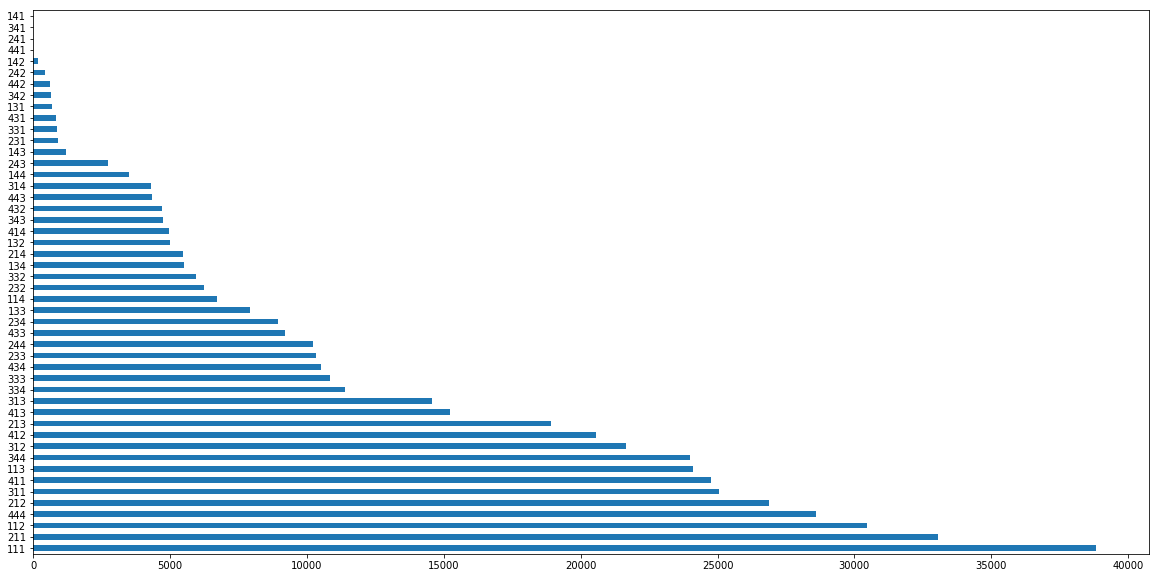

In [32]:
counts = pd.value_counts(segmented_rfm['RFMScore'].values, sort=True)
_ = plt.figure(figsize=(20,10))
_ = counts.plot.barh()
